In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy.stats import pearsonr, ttest_ind
import plotly.express as px

# Step 1: Load datasets (paths)
# Load core datasets
data_voice_combo = pd.read_csv(r"E:\Backup\IT Works Cyberpro Data Analyst\Final Python Project\mobile-data-and-voice-low-consumption-basket_1753728231022.csv.zip")
data_data_only = pd.read_csv(r"E:\Backup\IT Works Cyberpro Data Analyst\Final Python Project\data-only-mobile-broadband-basket_1753728368896.csv.zip")
data_subs_all = pd.read_csv(r"E:\Backup\IT Works Cyberpro Data Analyst\Final Python Project\mobile-cellular-subscriptions_1753728062739.csv.zip")
data_voice_low = pd.read_csv(r"E:\Backup\IT Works Cyberpro Data Analyst\Final Python Project\mobile-cellular-low-usage-basket_1753728330158.csv.zip")
data_subs_internet = pd.read_csv(r"E:\Backup\IT Works Cyberpro Data Analyst\Final Python Project\mobile-cellular-low-usage-basket_1753728330158.csv.zip")
data_population = pd.read_csv(r"E:\Backup\IT Works Cyberpro Data Analyst\Final Python Project\total-population_1753731141449.csv.zip")

# Step 2: Define a reusable function to explore datasets
def explore_dataset(df, name):
    print(f"\n📊 Exploring Dataset: {name}")
    print("-" * 60)
    
    print("🔹 First 5 Rows:")
    print(df.head(), "\n")
    
    print("🔹 Data Info:")
    print(df.info(), "\n")
    
    print("🔹 Summary Statistics:")
    print(df.describe(), "\n")

# Step 3: Apply the function to all datasets
explore_dataset(data_population, "Population (data_population)")
explore_dataset(data_data_only, "Data-Only Internet Basket (data_data_only)")
explore_dataset(data_subs_all, "Mobile Cellular Subscriptions (data_subs_all)")
explore_dataset(data_voice_low, "Low-Usage Voice Basket (data_voice_low)")
explore_dataset(data_subs_internet, "Active Mobile Broadband Subscriptions (data_subs_internet)")
explore_dataset(data_voice_combo, "Combined Data & Voice Basket (data_voice_combo)")



📊 Exploring Dataset: Population (data_population)
------------------------------------------------------------
🔹 First 5 Rows:
   seriesID seriesCode        seriesName  seriesParent  seriesUnits  entityID  \
0       260        i61  Total population           NaN          NaN         4   
1       260        i61  Total population           NaN          NaN         4   
2       260        i61  Total population           NaN          NaN         4   
3       260        i61  Total population           NaN          NaN         4   
4       260        i61  Total population           NaN          NaN         4   

  entityIso entityName  dataValue  dataYear dataNote  \
0       ABW      Aruba    88761.0      2000      NaN   
1       ABW      Aruba    90305.0      2001      NaN   
2       ABW      Aruba    91379.0      2002      NaN   
3       ABW      Aruba    92310.0      2003      NaN   
4       ABW      Aruba    93213.0      2004      NaN   

                                          dataSo

In [2]:
# Clean datasets (drop duplicates and nulls)
def clean_df(df):
    df = df.drop_duplicates()
    cols = ["entityName", "dataValue"]
    if "dataYear" in df.columns:
        cols.append("dataYear")
    df = df.dropna(subset=cols)
    df = df[df["dataValue"] >= 0]  # remove negative values
    return df

data_voice_combo = clean_df(data_voice_combo)
data_data_only = clean_df(data_data_only)
data_subs_all = clean_df(data_subs_all)
data_voice_low = clean_df(data_voice_low)
data_subs_internet = clean_df(data_subs_internet)
data_population = clean_df(data_population)


In [10]:
print(data_voice_combo.head())
print(data_data_only.head())
print(data_subs_all.head())
print(data_voice_low.head())
print(data_subs_internet.head())
print(data_population.head())

   seriesID      seriesCode                                    seriesName  \
0     34610  i271mb_low_ts$  Mobile data and voice low-consumption basket   
1     34610  i271mb_low_ts$  Mobile data and voice low-consumption basket   
2     34610  i271mb_low_ts$  Mobile data and voice low-consumption basket   
3     34610  i271mb_low_ts$  Mobile data and voice low-consumption basket   
4     34610  i271mb_low_ts$  Mobile data and voice low-consumption basket   

   seriesParent       seriesUnits  entityID entityIso entityName  dataValue  \
0           NaN  % GNI per capita         4       ABW      Aruba    33.5200   
1           NaN  % GNI per capita         4       ABW      Aruba    33.5200   
2           NaN  % GNI per capita         4       ABW      Aruba    33.5200   
3           NaN  % GNI per capita         4       ABW      Aruba    33.5196   
4           NaN  % GNI per capita         4       ABW      Aruba    33.5196   

   dataYear dataNote    dataSource  \
0      2018      NaN    

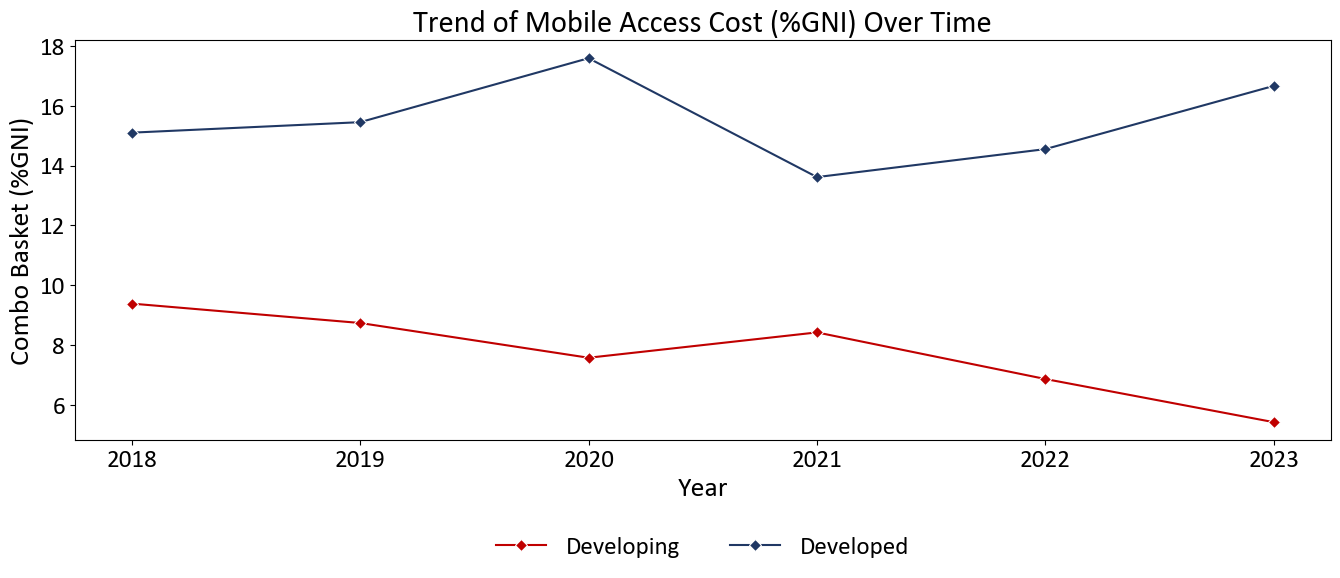

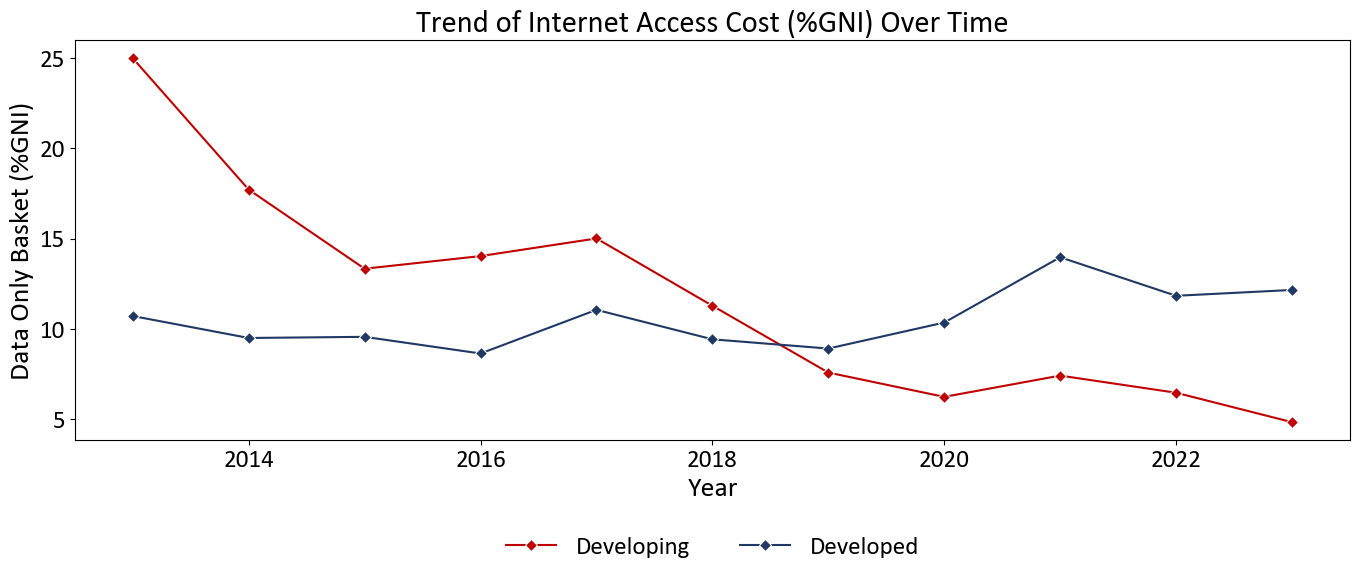

In [12]:
# --- Global chart style ---
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 22,
    'axes.labelsize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'legend.title_fontsize': 20,
    'font.family': 'Calibri'
})

# --- Function to calculate country-level averages ---
def avg_by_country(df, label):
    return df.groupby("entityName")["dataValue"].mean().reset_index(name=label)

# --- Compute average values ---
voice_combo = avg_by_country(data_voice_combo, "Combo_Basket_%GNI")
data_only = avg_by_country(data_data_only, "DataOnly_Basket_%GNI")
voice_low = avg_by_country(data_voice_low, "VoiceOnly_Basket_%GNI")
subs_all = avg_by_country(data_subs_all, "Avg_Mobile_Subscriptions")
subs_internet = avg_by_country(data_subs_internet, "Avg_Internet_Subscriptions")
population = avg_by_country(data_population, "Avg_Population")

# --- Merge all datasets ---
dfs = [voice_combo, data_only, voice_low, subs_all, subs_internet, population]
merged = reduce(lambda left, right: pd.merge(left, right, on="entityName", how="outer"), dfs)

# --- Region & dev status mapping ---
region_map = {
    "India": "Asia", "China": "Asia", "Bangladesh": "Asia", "Pakistan": "Asia",
    "Kenya": "Africa", "Nigeria": "Africa", "Ethiopia": "Africa", "South Africa": "Africa",
    "Brazil": "Americas", "Mexico": "Americas", "United States": "Americas", "Haiti": "Americas",
    "Germany": "Europe", "France": "Europe", "Ukraine": "Europe", "Poland": "Europe"
}

dev_status_map = {
    "India": "Developing", "Kenya": "Developing", "Bangladesh": "Developing",
    "Nigeria": "Developing", "Ethiopia": "Developing", "Pakistan": "Developing",
    "Brazil": "Developing", "South Africa": "Developing", "Haiti": "Developing",
    "Germany": "Developed", "France": "Developed", "United States": "Developed", "Poland": "Developed"
}

merged["Region"] = merged["entityName"].map(region_map)
merged["Development_Status"] = merged["entityName"].map(dev_status_map)

# --- Per capita calculations ---
merged["Mobile_Sub_per_Capita"] = merged["Avg_Mobile_Subscriptions"] / merged["Avg_Population"]
merged["Internet_Sub_per_Capita"] = merged["Avg_Internet_Subscriptions"] / merged["Avg_Population"]

# --- Remove unknown region ---
df = merged.dropna(subset=["Region"])
df.to_csv("merged_summary.csv", index=False)

# --- Trend plot: Mobile cost ---
data_voice_combo["Development"] = data_voice_combo["entityName"].map(dev_status_map)
trend_df = data_voice_combo.dropna(subset=["Development"])

# --- Trend plot: Mobile cost ---
data_voice_combo["Development"] = data_voice_combo["entityName"].map(dev_status_map)
trend_df = data_voice_combo.dropna(subset=["Development"])
trend_df = trend_df[(trend_df["dataYear"] >= 2008) & (trend_df["dataYear"] <= 2023)]  # filter years

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=trend_df, x="dataYear", y="dataValue", hue="Development",
    estimator="mean", errorbar=None, marker="D",
    palette={"Developing": "#C00000", "Developed": "#203864"}
)
plt.title("Trend of Mobile Access Cost (%GNI) Over Time")
plt.xlabel("Year")
plt.ylabel("Combo Basket (%GNI)")
plt.grid(False)
plt.legend(title="", frameon=False, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()

# --- Trend plot: Internet cost ---
data_data_only["Development"] = data_data_only["entityName"].map(dev_status_map)
trend_internet = data_data_only.dropna(subset=["Development"])
trend_internet = trend_internet[(trend_internet["dataYear"] >= 2008) & (trend_internet["dataYear"] <= 2023)]  # filter years

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=trend_internet, x="dataYear", y="dataValue", hue="Development",
    estimator="mean", errorbar=None, marker="D",
    palette={"Developing": "#C00000", "Developed": "#203864"}
)
plt.title("Trend of Internet Access Cost (%GNI) Over Time")
plt.xlabel("Year")
plt.ylabel("Data Only Basket (%GNI)")
plt.grid(False)
plt.legend(title="", frameon=False, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()


# --- Interactive maps ---
# --- Interactive maps with 5+ shades ---

# --- Interactive maps with animation for 2008–2023 ---

# Mobile Access: dark navy to light blue
fig_map_combo = px.choropleth(
    data_voice_combo[
        (data_voice_combo["dataYear"] >= 2008) &
        (data_voice_combo["dataYear"] <= 2023)
    ].rename(columns={"entityName": "Country", "dataValue": "Combo Basket (%GNI)"}),
    locations="Country",
    locationmode="country names",
    color="Combo Basket (%GNI)",
    animation_frame="dataYear",  # animate by year
    color_continuous_scale=[
        (0.0, "#203864"),  # dark navy
        (0.25, "#4F659D"),
        (0.5, "#7B8EC1"),
        (0.75, "#A9B9DC"),
        (1.0, "#DAE3F3")   # light blue
    ],
    title="Cost of Mobile Access (% GNI), 2008–2023",
    labels={"Combo Basket (%GNI)": "% of GNI"},
    width=1400,
    height=600
)
fig_map_combo.show()

# Internet Access: dark red to light pink
fig_map_internet = px.choropleth(
    data_data_only[
        (data_data_only["dataYear"] >= 2008) &
        (data_data_only["dataYear"] <= 2023)
    ].rename(columns={"entityName": "Country", "dataValue": "Internet Basket (%GNI)"}),
    locations="Country",
    locationmode="country names",
    color="Internet Basket (%GNI)",
    animation_frame="dataYear",  # animate by year
    color_continuous_scale=[
        (0.0, "#C00000"),  # dark red
        (0.25, "#D15454"),
        (0.5, "#E38A8A"),
        (0.75, "#F0BDBD"),
        (1.0, "#FFCCCC")   # light pink
    ],
    title="Cost of Internet Access (% GNI), 2008–2023",
    labels={"Internet Basket (%GNI)": "% of GNI"},
    width=1400,
    height=600
)
fig_map_internet.show()




In [11]:
merged.head()

,entityName,Combo_Basket_%GNI,DataOnly_Basket_%GNI,VoiceOnly_Basket_%GNI,Avg_Mobile_Subscriptions,Avg_Internet_Subscriptions,Avg_Population,Region,Development_Status,Mobile_Sub_per_Capita,Internet_Sub_per_Capita
0,Afghanistan,13.027234,12.504431,8.379279,6.316555e+06,8.379279,30918064.00,NaN,NaN,0.204300,2.710156e-07
1,Albania,10.016907,9.160144,16.539148,1.176075e+06,16.539148,2958294.00,NaN,NaN,0.397552,5.590772e-06
2,Algeria,11.649356,11.076798,11.855456,1.540618e+07,11.855456,38159784.00,NaN,NaN,0.403728,3.106793e-07
3,American Samoa,30.556667,22.370000,13.145000,1.055250e+03,13.145000,53469.72,NaN,NaN,0.019735,2.458401e-04
4,Andorra,12.661492,13.104106,14.780329,3.460036e+04,14.780329,76014.84,NaN,NaN,0.455179,1.944400e-04


<small> Trend: Internet Cost (% of GNI, mobile only)
Developing countries : A strong and steady decline in cost of the Internet - from 23% of GNI in 2013 to about 5% in 2024.
This is the most impressive positive trend on  chart.
Possible factors: International aid and digital equality programs,development of 3G/4G/5G networks,Cheaper mobile devices.
Developed countries: Internet prices remain stable, fluctuating between 12% and 15% of GNI.

In [4]:
# Get top 15 countries with the most expensive internet (Data Only Basket) in 2024
top15_expensive_internet = data_data_only[data_data_only["dataYear"] == 2024]
top15_expensive_internet = top15_expensive_internet[["entityName", "dataValue"]]
top15_expensive_internet = top15_expensive_internet.sort_values(by="dataValue", ascending=False).head(15)

# Rename columns for readability
top15_expensive_internet = top15_expensive_internet.rename(columns={
    "entityName": "Country",
    "dataValue": "Internet Cost (%GNI)"
})

# Print the result
print("🌐 Top 15 Countries with the Most Expensive Internet in 2024 (% of GNI):")
print(top15_expensive_internet.to_string(index=False))



🌐 Top 15 Countries with the Most Expensive Internet in 2024 (% of GNI):
                         Country  Internet Cost (%GNI)
                  Cayman Islands                 83.88
                         Bermuda                 80.00
                     Saint Lucia                 76.02
                        Dominica                 74.33
Saint Vincent and the Grenadines                 70.60
                         Grenada                 69.15
                       Greenland                 65.44
         Falkland (Malvinas) Is.                 63.10
                  Cayman Islands                 61.87
                         Bermuda                 58.86
                         Lebanon                 56.97
                       Greenland                 51.81
             Antigua and Barbuda                 49.71
                         Curacao                 47.49
           Saint Kitts and Nevis                 46.60


  Hypothesis                                        Description         r  \
0         H1           Higher GNI → More Internet Subscriptions -0.525454   
1         H2         Developing countries pay more for internet       NaN   
2         H3          Africa pays more for internet than Europe       NaN   
3         H4  More mobile subscriptions → more internet subs... -0.038136   
4         H5             Higher GNI → More Mobile Subscriptions -0.548977   
5         H6                Low GNI vs High GNI (Internet Subs)       NaN   
6         H7                   Asia vs Americas (Internet Cost)       NaN   
7         H8                     Higher GNI → Lower Mobile Cost -0.819814   

          p         t  
0  0.065167       NaN  
1  0.905035  0.122083  
2  0.274635  1.226439  
3  0.901561       NaN  
4  0.052014       NaN  
5  0.056831  2.127442  
6  0.008357 -4.847042  
7  0.000601       NaN  


C:\Users\mikha\AppData\Local\Temp\ipykernel_34492\1828740313.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



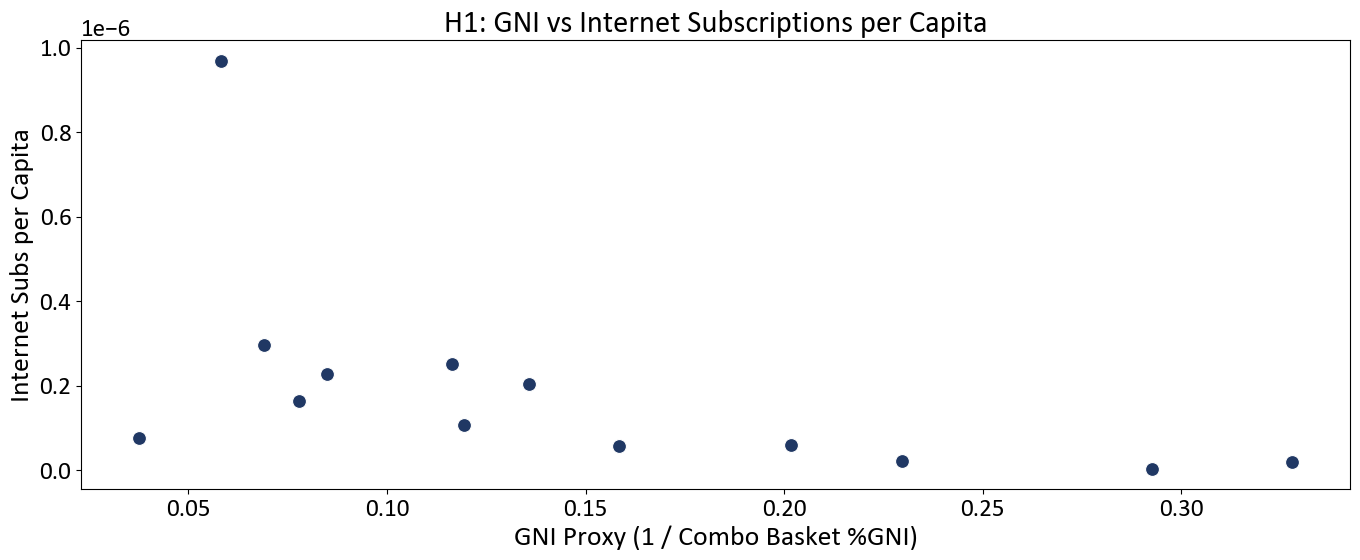

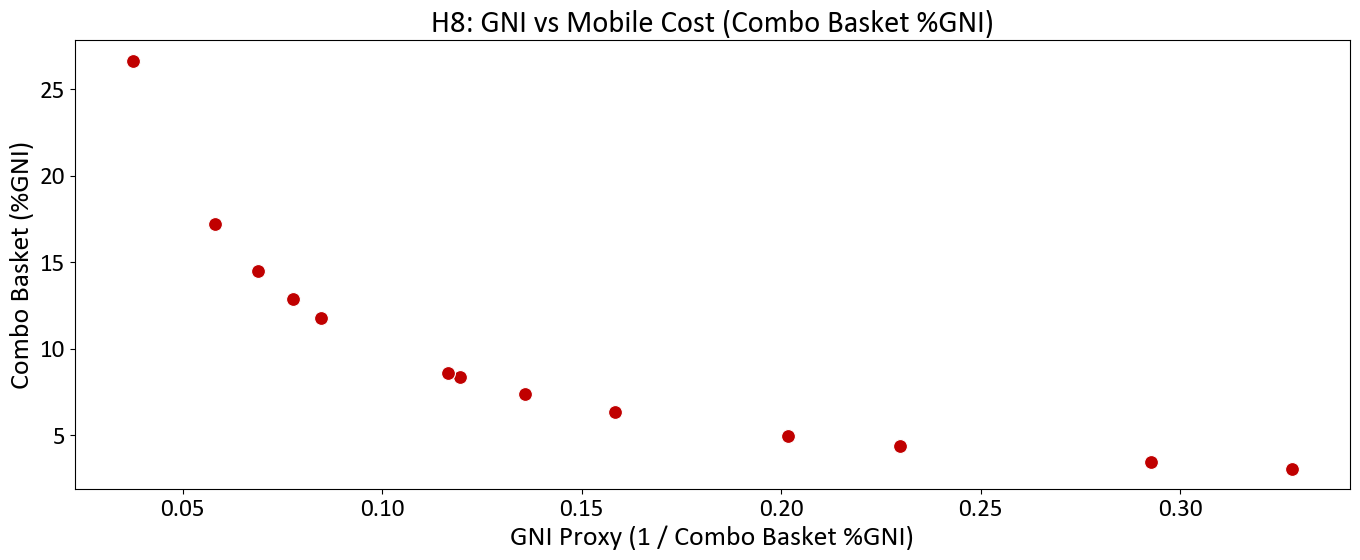

In [5]:


# --- Apply same chart style ---
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 22,
    'axes.labelsize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'legend.title_fontsize': 20,
    'font.family': 'Calibri'
})

# --- Load & clean ---
df = pd.read_csv("merged_summary.csv")
df_clean = df.dropna(subset=[
    "Combo_Basket_%GNI", "DataOnly_Basket_%GNI",
    "Internet_Sub_per_Capita", "Mobile_Sub_per_Capita",
    "Development_Status", "Region"
])
df_clean["GNI_proxy"] = 1 / df_clean["Combo_Basket_%GNI"]

# --- Hypotheses tests ---
results = []
r1, p1 = pearsonr(df_clean["GNI_proxy"], df_clean["Internet_Sub_per_Capita"])
results.append(("H1", "Higher GNI → More Internet Subscriptions", r1, p1, None))

dev = df_clean[df_clean["Development_Status"] == "Developing"]["DataOnly_Basket_%GNI"]
devd = df_clean[df_clean["Development_Status"] == "Developed"]["DataOnly_Basket_%GNI"]
t2, p2 = ttest_ind(dev, devd, nan_policy="omit")
results.append(("H2", "Developing countries pay more for internet", None, p2, t2))

africa = df_clean[df_clean["Region"] == "Africa"]["DataOnly_Basket_%GNI"]
europe = df_clean[df_clean["Region"] == "Europe"]["DataOnly_Basket_%GNI"]
t3, p3 = ttest_ind(africa, europe, nan_policy="omit")
results.append(("H3", "Africa pays more for internet than Europe", None, p3, t3))

r4, p4 = pearsonr(df_clean["Mobile_Sub_per_Capita"], df_clean["Internet_Sub_per_Capita"])
results.append(("H4", "More mobile subscriptions → more internet subscriptions", r4, p4, None))

r5, p5 = pearsonr(df_clean["GNI_proxy"], df_clean["Mobile_Sub_per_Capita"])
results.append(("H5", "Higher GNI → More Mobile Subscriptions", r5, p5, None))

threshold = df_clean["GNI_proxy"].median()
low = df_clean[df_clean["GNI_proxy"] < threshold]["Internet_Sub_per_Capita"]
high = df_clean[df_clean["GNI_proxy"] >= threshold]["Internet_Sub_per_Capita"]
t6, p6 = ttest_ind(low, high, nan_policy="omit")
results.append(("H6", "Low GNI vs High GNI (Internet Subs)", None, p6, t6))

asia = df_clean[df_clean["Region"] == "Asia"]["DataOnly_Basket_%GNI"]
americas = df_clean[df_clean["Region"] == "Americas"]["DataOnly_Basket_%GNI"]
t7, p7 = ttest_ind(asia, americas, nan_policy="omit")
results.append(("H7", "Asia vs Americas (Internet Cost)", None, p7, t7))

r8, p8 = pearsonr(df_clean["GNI_proxy"], df_clean["Combo_Basket_%GNI"])
results.append(("H8", "Higher GNI → Lower Mobile Cost", r8, p8, None))

summary = pd.DataFrame(results, columns=["Hypothesis", "Description", "r", "p", "t"])
print(summary)

# --- Visualization ---
plt.figure(figsize=(14, 6))
sns.scatterplot(x="GNI_proxy", y="Internet_Sub_per_Capita", data=df_clean, s=100, color="#203864")
plt.title("H1: GNI vs Internet Subscriptions per Capita")
plt.xlabel("GNI Proxy (1 / Combo Basket %GNI)")
plt.ylabel("Internet Subs per Capita")
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(x="GNI_proxy", y="Combo_Basket_%GNI", data=df_clean, s=100, color="#C00000")
plt.title("H8: GNI vs Mobile Cost (Combo Basket %GNI)")
plt.xlabel("GNI Proxy (1 / Combo Basket %GNI)")
plt.ylabel("Combo Basket (%GNI)")
plt.grid(False)
plt.tight_layout()
plt.show()
